In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox, yeojohnson
import numpy as np


In [44]:

data = pd.read_csv("../data/raw.csv")
df_ml = data.copy()
df_pb = data.copy()

data.head()

ID Is_Product_Details_viewed  Session_Activity_Count   
0  Session_ID_0                       Yes                       4  \
1  Session_ID_1                        No                      38   
2  Session_ID_2                        No                       8   
3  Session_ID_3                        No                       6   
4  Session_ID_4                       Yes                      31   

   No_Items_Added_InCart  No_Items_Removed_FromCart  No_Cart_Viewed   
0                    1.0                          0             0.0  \
1                    0.0                          0             2.0   
2                    5.0                          0             0.0   
3                    0.0                          0             2.0   
4                   14.0                         12             1.0   

   No_Checkout_Confirmed  No_Checkout_Initiated   No_Cart_Items_Viewed   
0                      0                       0                     1  \
1                      0                       0                     2   
2                      1                       1                     1   
3                      0                       0                     4   
4                      0                       0                     4   

   No_Customer_Login  No_Page_Viewed  Customer_Segment_Type  Cart_Abandoned  
0                  0               0                      0               1  
1                  0               2                      0               1  
2                  0               0                      1               0  
3                  0               0                      0               1  
4                  0               0                      2               1

INFORMACION DE LA BASE DE DATOS

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

TRATAMIENTO DE DATOS

TRANSFORMAMOS LA VARIABLE ID

In [46]:
data = data.drop("ID", axis=1)
data.index = [i for i in range(1, len(data)+1)]

In [47]:
data.head()

Is_Product_Details_viewed  Session_Activity_Count  No_Items_Added_InCart   
1                       Yes                       4                    1.0  \
2                        No                      38                    0.0   
3                        No                       8                    5.0   
4                        No                       6                    0.0   
5                       Yes                      31                   14.0   

   No_Items_Removed_FromCart  No_Cart_Viewed  No_Checkout_Confirmed   
1                          0             0.0                      0  \
2                          0             2.0                      0   
3                          0             0.0                      1   
4                          0             2.0                      0   
5                         12             1.0                      0   

   No_Checkout_Initiated   No_Cart_Items_Viewed  No_Customer_Login   
1                       0                     1                  0  \
2                       0                     2                  0   
3                       1                     1                  0   
4                       0                     4                  0   
5                       0                     4                  0   

   No_Page_Viewed  Customer_Segment_Type  Cart_Abandoned  
1               0                      0               1  
2               2                      0               1  
3               0                      1               0  
4               0                      0               1  
5               0                      2               1

In [48]:

cat = data[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]]

num = data.drop(columns=["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"])


VARIABLES CATEGORICAS

In [49]:
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(20, 8))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

VARIABLES NUMERICAS

In [50]:
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for column, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.histplot(num[column], kde=True, ax=subplot)

VARIABLES NUMERICAS Vs CART_ABANDONED


In [51]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=cat["Cart_Abandoned"], y=num[var], ax=subplot)

In [52]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 1 to 4284
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Session_Activity_Count     4284 non-null   int64  
 1   No_Items_Added_InCart      4275 non-null   float64
 2   No_Items_Removed_FromCart  4284 non-null   int64  
 3   No_Cart_Viewed             4275 non-null   float64
 4   No_Checkout_Confirmed      4284 non-null   int64  
 5   No_Checkout_Initiated      4284 non-null   int64  
 6   No_Cart_Items_Viewed       4284 non-null   int64  
 7   No_Customer_Login          4284 non-null   int64  
 8   No_Page_Viewed             4284 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 334.7 KB


Is_Product_Details_viewed Vs Cart_Abandoned


<Axes: xlabel='Is_Product_Details_viewed', ylabel='count'>

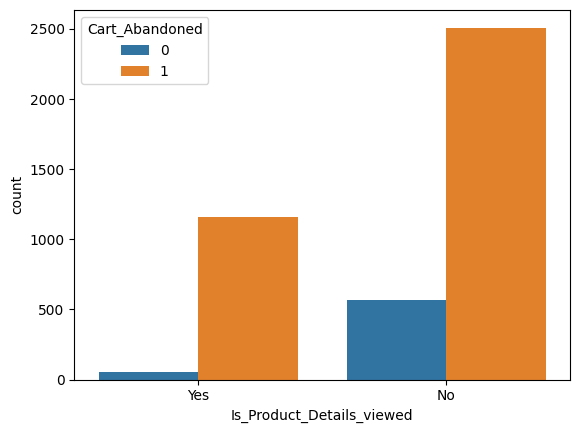

In [53]:
sns.countplot(x=data.Is_Product_Details_viewed,hue=data.Cart_Abandoned)

DIAGRAMA DE CORRELLACION

In [54]:
corr = num.corr()
sns.heatmap(corr)

<Axes: >

PREPARACION DE DATOS

In [55]:
data.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

IMPUTANDO DATOS PERDIDOS

<Axes: ylabel='No_Items_Added_InCart'>

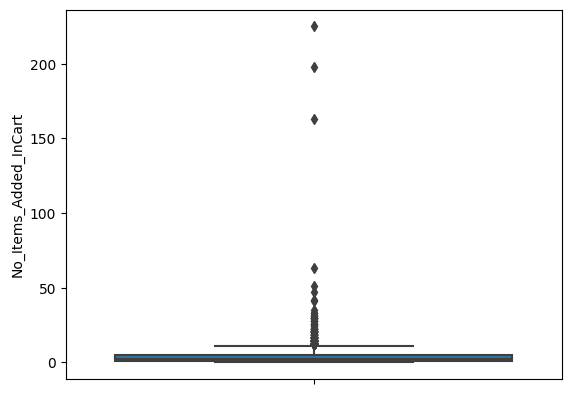

In [56]:
sns.boxplot(y=data["No_Items_Added_InCart"])


<Axes: ylabel='No_Cart_Viewed'>

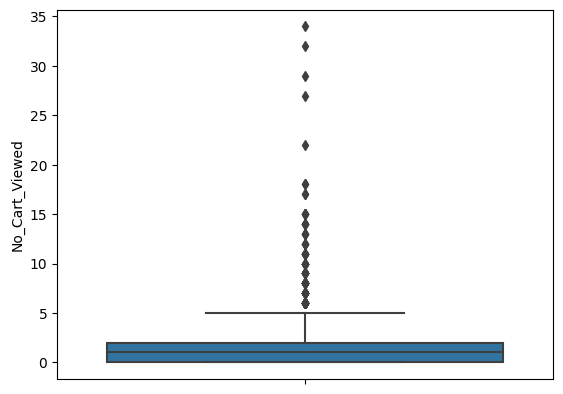

In [57]:
sns.boxplot(y=data["No_Cart_Viewed"])

DADOS OUTLIERS EN LAS COLUMNAS FALTANTES USAMOS LA MEDIANA COMO METODO DE REFERENCIA PARA COMPLETADO DE DATOS

In [58]:
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].fillna(data['No_Items_Added_InCart'].median())

In [59]:
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].fillna(data['No_Cart_Viewed'].median())

In [60]:
data.isna().sum()

Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [61]:
data['No_Cart_Viewed'] = data['No_Cart_Viewed'].astype('int64')
data['No_Items_Added_InCart'] = data['No_Items_Added_InCart'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4284 entries, 1 to 4284
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Is_Product_Details_viewed  4284 non-null   object
 1   Session_Activity_Count     4284 non-null   int64 
 2   No_Items_Added_InCart      4284 non-null   int64 
 3   No_Items_Removed_FromCart  4284 non-null   int64 
 4   No_Cart_Viewed             4284 non-null   int64 
 5   No_Checkout_Confirmed      4284 non-null   int64 
 6   No_Checkout_Initiated      4284 non-null   int64 
 7   No_Cart_Items_Viewed       4284 non-null   int64 
 8   No_Customer_Login          4284 non-null   int64 
 9   No_Page_Viewed             4284 non-null   int64 
 10  Customer_Segment_Type      4284 non-null   int64 
 11  Cart_Abandoned             4284 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 435.1+ KB


In [62]:

cat = data[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]]

num = data.drop(columns=["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"])


ESCALAMOS LOS DATOS

In [63]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(num)
x_scaled

array([[0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.08715596, 0.        , 0.        , ..., 0.0078125 , 0.        ,
        0.05714286],
       [0.01834862, 0.02222222, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       ...,
       [0.00917431, 0.00444444, 0.        , ..., 0.00390625, 0.        ,
        0.        ],
       [0.01834862, 0.01333333, 0.        , ..., 0.00390625, 0.        ,
        0.05714286],
       [0.07110092, 0.01777778, 0.        , ..., 0.02734375, 0.        ,
        0.02857143]])

In [64]:
df_scaled = pd.DataFrame(x_scaled,columns=num.columns)
df_scaled.head(3)

Session_Activity_Count  No_Items_Added_InCart  No_Items_Removed_FromCart   
0                0.009174               0.004444                        0.0  \
1                0.087156               0.000000                        0.0   
2                0.018349               0.022222                        0.0   

   No_Cart_Viewed  No_Checkout_Confirmed  No_Checkout_Initiated    
0        0.000000               0.000000                0.000000  \
1        0.058824               0.000000                0.000000   
2        0.000000               0.090909                0.071429   

   No_Cart_Items_Viewed  No_Customer_Login  No_Page_Viewed  
0              0.003906                0.0        0.000000  
1              0.007812                0.0        0.057143  
2              0.003906                0.0        0.000000

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

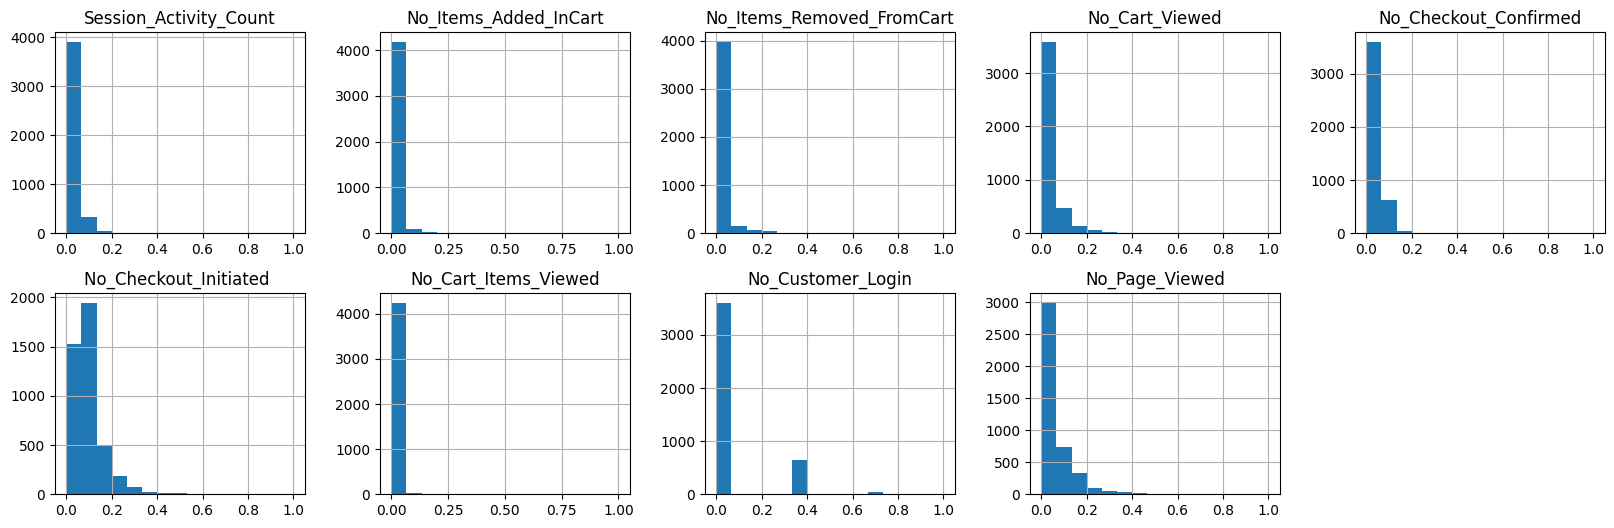

In [65]:
df_scaled.hist(bins=15, figsize=(20, 6), layout=(2, 5))

In [66]:
standard_scaler = StandardScaler()
df_normalize = pd.DataFrame(standard_scaler.fit_transform(df_scaled), columns=df_scaled.columns)

In [67]:
df_scaled_transformed = df_scaled.apply(lambda x: yeojohnson(x)[0])

# Aplicar la transformación Yeo-Johnson a df_num
df_num_transformed = num.apply(lambda x: yeojohnson(x)[0])

NORMALIZACION DE DATOS ESCALADOS

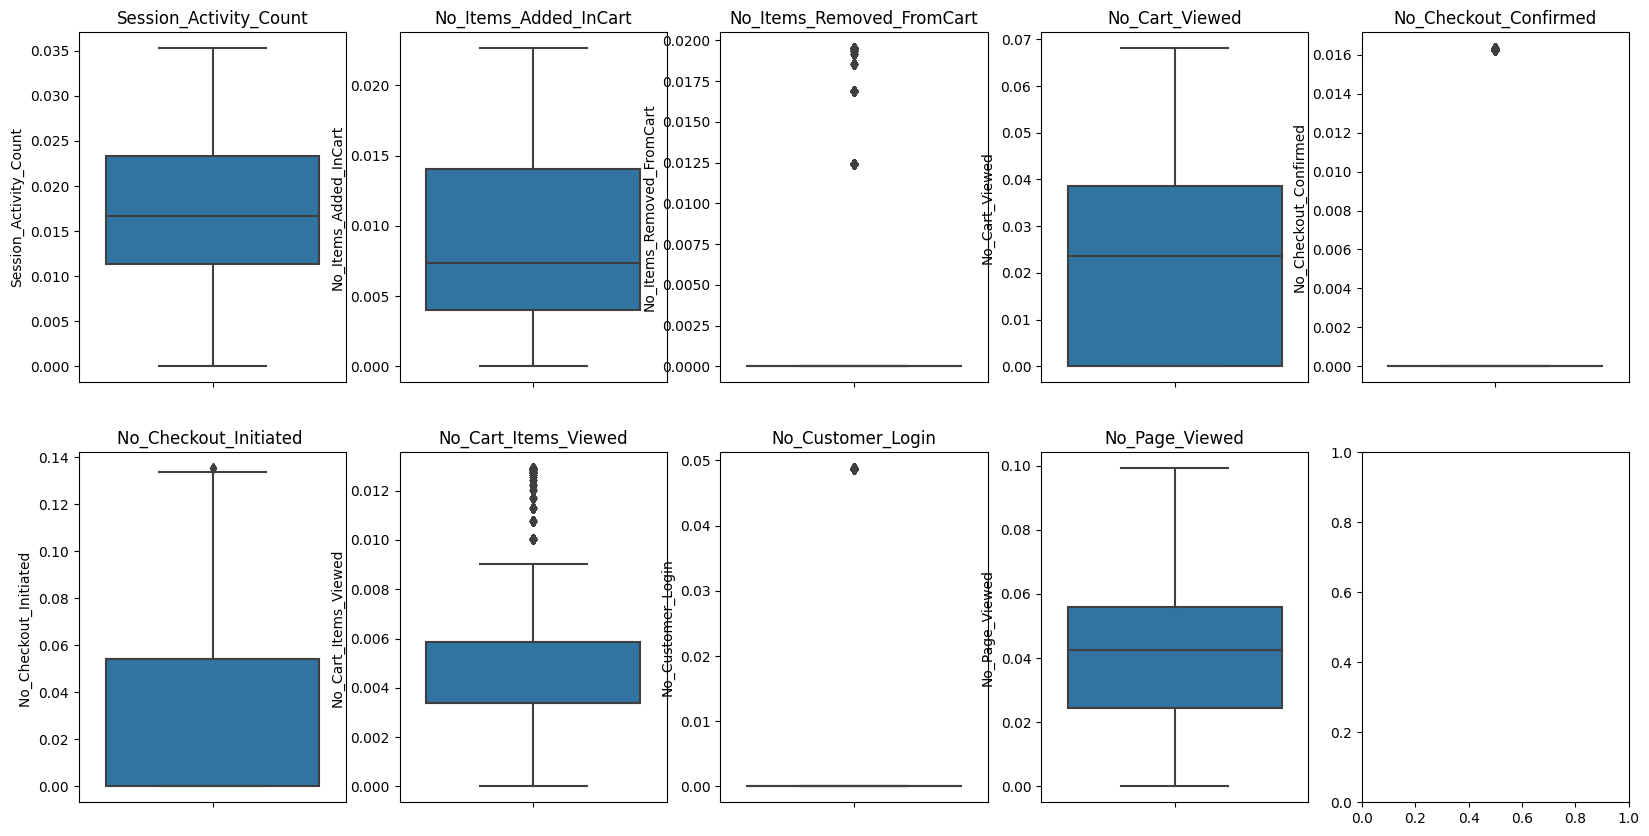

In [68]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_scaled_transformed.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_scaled_transformed[var], ax=subplot)
    subplot.set_title(var)

In [69]:
df_scaled_transformed.hist(bins=15, figsize=(20, 6), layout=(2, 5))

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

NORMALIZACION DE DATOS NO ESCALADOS

In [70]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for var, subplot in zip(df_num_transformed.columns.tolist(), ax.flatten()):
    sns.boxplot(y=df_num_transformed[var], ax=subplot)
    subplot.set_title(var)

In [71]:
df_num_transformed.hist(bins=15, figsize=(20, 6), layout=(2, 5))

array([[<Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>,
        <Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>,
        <Axes: title={'center': 'No_Page_Viewed'}>, <Axes: >]],
      dtype=object)

DADO EL COMPORTAMIENTO DE LAS FRECUENCIAS CONSIDERAMOS LOS DATOS TRANSFORMADOS SIN ESCALAR

In [72]:
df_final = pd.concat([df_num_transformed, cat], axis=1)

CONSTRUCCION DEL DATAFRAME PARA LA REPRESENTACION EN POWER BI


In [73]:
df_pb = df_final.copy()

In [74]:
df_pb[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]].value_counts()

Is_Product_Details_viewed  Customer_Segment_Type  Cart_Abandoned
No                         0                      1                 1537
                           1                      1                  757
Yes                        0                      1                  590
                           1                      1                  353
No                         0                      0                  258
Yes                        2                      1                  216
No                         2                      1                  215
                           1                      0                  209
                           2                      0                   98
Yes                        1                      0                   26
                           0                      0                   20
                           2                      0                    5
Name: count, dtype: int64

In [75]:
df_pb["Customer_Segment_Type"] = df_pb["Customer_Segment_Type"].replace(
    {0 : "cliente objetivo", 
     1 : "cliente leal", 
     2 : "Cliente No Segmentado"})

In [76]:
df_pb["Cart_Abandoned"] = df_pb["Cart_Abandoned"].replace(
    {0 : "No", 
     1 : "Si"})

In [77]:
df_pb["Is_Product_Details_viewed"] = df_pb["Is_Product_Details_viewed"].replace(
    {"Yes" : "Si"})

In [78]:
df_pb[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]].value_counts()

Is_Product_Details_viewed  Customer_Segment_Type  Cart_Abandoned
No                         cliente objetivo       Si                1537
                           cliente leal           Si                 757
Si                         cliente objetivo       Si                 590
                           cliente leal           Si                 353
No                         cliente objetivo       No                 258
Si                         Cliente No Segmentado  Si                 216
No                         Cliente No Segmentado  Si                 215
                           cliente leal           No                 209
                           Cliente No Segmentado  No                  98
Si                         cliente leal           No                  26
                           cliente objetivo       No                  20
                           Cliente No Segmentado  No                   5
Name: count, dtype: int64

In [79]:
nuevos_nombres = [
    "Producto_Detalles_Vistos",
    "Cantidad_Actividades_Sesión",
    "Cantidad_Artículos_En_Carro",
    "Cantidad_Artículos_Eliminados_Carro",
    "Cantidad_Visitas_Carro",
    "Confirmaciones_Compra",
    "Inicios_Pago",
    "Vistas_Productos_Carro",
    "Inicios_Sesión_Cliente",
    "Vistas_Páginas",
    "Segmento_Cliente",
    "Abandono_Carro"
]
df_pb.columns = nuevos_nombres

print(df_pb.head())

   Producto_Detalles_Vistos  Cantidad_Actividades_Sesión   
1                  1.455377                     0.644252  \
2                  2.928392                    -0.000000   
3                  1.916876                     1.488606   
4                  1.723772                    -0.000000   
5                  2.802683                     2.056026   

   Cantidad_Artículos_En_Carro  Cantidad_Artículos_Eliminados_Carro   
1                    -0.000000                            -0.000000  \
2                    -0.000000                             0.877594   
3                    -0.000000                            -0.000000   
4                    -0.000000                             0.877594   
5                     0.307436                             0.600289   

   Cantidad_Visitas_Carro  Confirmaciones_Compra  Inicios_Pago   
1               -0.000000              -0.000000      0.601601  \
2               -0.000000              -0.000000      0.880544   
3             

In [80]:
#ruta_archivo_csv = "../data/data_power_bi.csv"

#df_pb.to_csv(ruta_archivo_csv, index=False)

CONSTRUCCION DEL DATAFRAME PARA EL ENTRENAMIENTO DE MODELOS



In [81]:
df_ml = df_final.copy()

In [82]:
df_ml[["Is_Product_Details_viewed", "Customer_Segment_Type", "Cart_Abandoned"]].value_counts()

Is_Product_Details_viewed  Customer_Segment_Type  Cart_Abandoned
No                         0                      1                 1537
                           1                      1                  757
Yes                        0                      1                  590
                           1                      1                  353
No                         0                      0                  258
Yes                        2                      1                  216
No                         2                      1                  215
                           1                      0                  209
                           2                      0                   98
Yes                        1                      0                   26
                           0                      0                   20
                           2                      0                    5
Name: count, dtype: int64

In [83]:
df_ml["Is_Product_Details_viewed"] = df_ml["Is_Product_Details_viewed"].replace({"No" : 0, "Yes" : 1})
df_ml["Is_Product_Details_viewed"].value_counts()

Is_Product_Details_viewed
0    3074
1    1210
Name: count, dtype: int64

In [84]:
#ruta_archivo_csv2 = "../data/data_machine_learning.csv"

#df_ml.to_csv(ruta_archivo_csv2, index=False)